## Imports

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA
from tqdm import tqdm
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

from IPython.display import display

sns.set_style('whitegrid')

## Load Data

In [77]:
split_frac = 0.9
df = pd.read_csv('../processed_data/v4/BH_rf_impute_std.csv' , index_col='obs_id').sample(frac=1 , random_state=2)
train_bh = df.iloc[:int(len(df)*split_frac)]
test_bh = df.iloc[int(len(df)*split_frac):]

df = pd.read_csv('../processed_data/v4/CV_rf_impute_std.csv' , index_col='obs_id').sample(frac=1 ,  random_state=2)
train_cv = df.iloc[:int(len(df)*split_frac)]
test_cv = df.iloc[int(len(df)*split_frac):]

df = pd.read_csv('../processed_data/v4/NS_rf_impute_std.csv' , index_col='obs_id').sample(frac=1 ,  random_state=2)
train_ns = df.iloc[:int(len(df)*split_frac)]
test_ns = df.iloc[int(len(df)*split_frac):]

df = pd.read_csv('../processed_data/v4/PULSAR_rf_impute_std.csv' , index_col='obs_id').sample(frac=1 ,  random_state=2)
train_plsr = df.iloc[:int(len(df)*split_frac)]
test_plsr = df.iloc[int(len(df)*split_frac):]

inter_obs_params = ['var_inter_prob' , 'var_inter_index' , 'var_inter_sigma']

data = pd.concat([train_bh , train_ns , train_cv , train_plsr] , axis=0)
#data = data.drop(columns=inter_obs_params)

from features import features as feat 
feat_to_drop = list(feat['model_fit']['powerlaw']) + list(feat['model_fit']['bb']) + list(feat['model_fit']['brems']) 
data = data.drop(columns=inter_obs_params+feat_to_drop)

train_data = data.copy()
train_data.to_csv('current_data/train_data.csv')


data = pd.concat([test_bh , test_ns , test_cv , test_plsr] , axis=0)
data = data.drop(columns=inter_obs_params+feat_to_drop)
test_data = data.copy()
test_data.to_csv('current_data/test_data.csv')


In [78]:

# enaable these two lines for NS-BH
#train_data = pd.read_csv('current_data/train_data.csv' , index_col='obs_id')
#test_data = pd.read_csv('current_data/test_data.csv' , index_col='obs_id')

train_data = train_data.replace('NS' , 'XRB')
train_data = train_data.replace('BH' , 'XRB')

test_data = test_data.replace('NS' , 'XRB')
test_data = test_data.replace('BH' , 'XRB')




#class_to_select = ['XRB' , 'CV' , 'PULSAR']

train_data = train_data.replace('XRB' , 'OTHER')
train_data = train_data.replace('PULSAR' , 'OTHER')

test_data = test_data.replace('XRB' , 'OTHER')
test_data = test_data.replace('PULSAR' , 'OTHER')

#data = train_data[train_data['class'].isin(class_to_select)]
data = train_data.copy()
#display(data)
display(train_data)
display(test_data)


,class,src_n,src_id,significance,photflux_aper_hilim_b,photflux_aper_lolim_h,photflux_aper_lolim_s,photflux_aper_lolim_m,photflux_aper_s,photflux_aper_lolim_u,...,kp_prob,hard_hs_lolim,hard_ms_lolim,hard_ms,hard_hs,hard_hs_hilim,hard_hm,hard_hm_hilim,hard_hm_lolim,hard_ms_hilim
obs_id,,,,,,,,,,,,,,,,,,,,,
BH_OBS_166,OTHER,J1745-2900,BH0027,337.00,0.457311,0.899207,-1.342666,-0.880822,-1.151870,0.583634,...,0.455797,1.438404,0.542676,1.785429,1.249875,1.194242,1.293398,1.192059,1.502292,1.759492
BH_OBS_127,OTHER,J1745-2900,BH0027,337.00,0.385450,0.807273,-0.276919,-0.179517,-0.261758,0.481241,...,-0.536665,1.152962,-0.245293,-0.006877,1.022542,1.083427,1.061392,1.058564,1.304323,0.259376
BH_OBS_10,OTHER,GINGA 1354-645,BH0003,20.86,1.251739,1.266417,1.005601,1.631322,1.053372,0.020409,...,1.466017,0.843284,1.783647,1.038308,0.663145,0.624602,-0.174220,-0.470578,0.077421,0.871167
BH_OBS_95,OTHER,CXOU J100516.5-07420,BH0021,16.75,-0.283420,-1.010070,0.371057,0.520111,0.176560,-0.854247,...,0.091983,-1.002738,0.611253,0.303443,-0.998295,-1.107817,-1.494124,-1.853521,-1.419055,0.142545
BH_OBS_129,OTHER,J1745-2900,BH0027,337.00,0.144434,0.363676,-0.548890,-0.519213,-0.551172,0.598277,...,-0.218693,1.066402,-1.291524,-1.382809,1.249875,1.194242,1.293398,1.192059,1.373907,-0.200025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PULSAR_OBS_230,OTHER,PSR J1745-2900,PL0081,107.91,-0.273214,0.328998,-1.486799,-1.524315,-1.464423,-1.220830,...,0.099497,1.142291,1.306327,1.568535,1.033782,0.972940,1.236438,1.211643,1.334662,1.421843
PULSAR_OBS_32,OTHER,PSR J0358+5413,PL0009,19.44,-0.811593,-0.553635,-0.458295,-0.194746,-0.455130,0.403431,...,-1.651062,0.087207,0.472572,0.516074,0.301313,0.531225,-0.300976,-0.196815,-0.427648,0.707697
PULSAR_OBS_152,OTHER,PSR J1124-591,PL0042,144.29,1.308631,1.143625,1.225114,1.420095,1.246394,1.032127,...,-0.082372,0.229175,0.486765,0.148834,0.138479,0.058785,-0.116817,-0.315337,0.032056,-0.140939


,class,src_n,src_id,significance,photflux_aper_hilim_b,photflux_aper_lolim_h,photflux_aper_lolim_s,photflux_aper_lolim_m,photflux_aper_s,photflux_aper_lolim_u,...,kp_prob,hard_hs_lolim,hard_ms_lolim,hard_ms,hard_hs,hard_hs_hilim,hard_hm,hard_hm_hilim,hard_hm_lolim,hard_ms_hilim
obs_id,,,,,,,,,,,,,,,,,,,,,
BH_OBS_161,OTHER,J1745-2900,BH0027,337.00,0.326536,0.745035,-1.529405,-1.322178,-1.288191,0.912173,...,-0.398802,1.386468,0.699171,1.209727,1.249875,1.194242,1.161950,1.156769,1.411816,1.759492
BH_OBS_153,OTHER,J1745-2900,BH0027,337.00,0.307050,0.186235,0.038476,0.000052,-0.104177,0.540581,...,-0.000241,0.820709,-1.291524,-1.382809,1.249875,1.194242,1.293398,1.192059,1.070804,0.061474
BH_OBS_113,OTHER,CXOU J100517.1-07421,BH0022,11.12,-1.032851,-1.153975,-0.028222,-0.681739,-0.270783,0.750101,...,1.031978,-1.125584,-0.819182,-0.672292,-1.066802,-1.072799,-0.761301,-0.362290,-1.107696,-0.854891
BH_OBS_59,OTHER,CXOU J100510.9-07453,BH0017,4.58,-1.893722,-1.380435,-1.913040,-1.073507,-1.529290,0.454109,...,0.110274,-1.212145,0.905121,1.883476,-1.424593,-0.073439,-1.990834,-1.248963,-1.665379,1.759492
BH_OBS_120,OTHER,J1047+1234,BH0024,56.53,2.129977,1.788448,2.147187,2.130534,2.622295,2.668231,...,1.876196,0.208277,0.581141,0.052278,-0.017112,-0.236705,-0.065447,-0.422585,0.264607,-0.461525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PULSAR_OBS_429,OTHER,PSR J2047+105,PL0127,3.75,-1.348518,-1.065655,-0.633633,-0.697528,-0.649896,-1.138006,...,0.613959,-0.270240,-0.047399,0.170066,0.063225,0.388566,-0.265043,0.027244,-0.570261,0.448506
PULSAR_OBS_126,OTHER,PSR J1023-574,PL0029,22.45,-0.472215,-0.189560,-0.868705,-0.083840,-0.753567,0.173471,...,-1.416079,0.872383,1.469165,1.568535,1.033782,0.972940,0.091777,0.228011,-0.046663,1.421843
PULSAR_OBS_274,OTHER,PSR J1745-2900,PL0081,107.91,-0.254881,0.369144,-1.501060,-1.428951,-1.446348,-1.093818,...,1.330034,1.135277,1.124117,1.568535,1.033782,0.972940,1.222963,1.206490,1.307060,1.421843


In [79]:
info_col = [ 'class' , 'src_n' , 'src_id' , 'significance']
data_info = data[info_col]
data_val = data.drop(columns=info_col) 
data_label = data['class']

In [80]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()

# Hyper Parameter Tuning

In [8]:
rfc_v2 = RandomForestClassifier()

## Random Search

In [9]:
from sklearn.model_selection import RandomizedSearchCV

In [10]:
n_estimators = [int(x) for x in np.linspace(80 , 800 , num=40)]
max_features = ['log2' , 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 150, num = 40)]
min_samples_split = [int(x) for x in np.linspace(2,20 ,num = 30)]
min_samples_leaf = [int(x) for x in np.linspace(2,30 , num = 30)]
bootstrap = [True , False]

In [11]:
params_dict = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features ,
    'max_depth' :max_depth , 
    'min_samples_split' : min_samples_split , 
    'min_samples_leaf' : min_samples_leaf, 
    'bootstrap' : bootstrap 
}

In [24]:
rs = RandomizedSearchCV(
    rfc_v2 , 
    params_dict , 
    n_iter = 100,
    cv = 5 ,
    verbose = 5 ,
    n_jobs=-1 , 
    random_state= 0 
)

In [25]:
rs.fit(data_val , data_label)
rs.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 135,
 'min_samples_split': 9,
 'min_samples_leaf': 30,
 'max_features': 'sqrt',
 'max_depth': 1,
 'bootstrap': False}

In [26]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,393,6,18,log2,1,True,0.397683,0.399225,0.397992,1
1,135,9,30,sqrt,1,False,0.397683,0.399225,0.397992,1
2,763,9,7,sqrt,1,False,0.397683,0.399225,0.397992,1
3,523,16,26,sqrt,1,False,0.397683,0.399225,0.397992,1
4,135,9,20,log2,123,True,0.335907,0.387597,0.367867,5
5,98,8,15,sqrt,58,True,0.343629,0.399225,0.367104,6
6,596,12,30,log2,65,True,0.328185,0.403101,0.364790,7
7,578,18,30,sqrt,62,True,0.332046,0.399225,0.364015,8
8,578,15,12,log2,4,True,0.351351,0.395349,0.364012,9
9,301,6,17,sqrt,107,True,0.347490,0.387597,0.364006,10


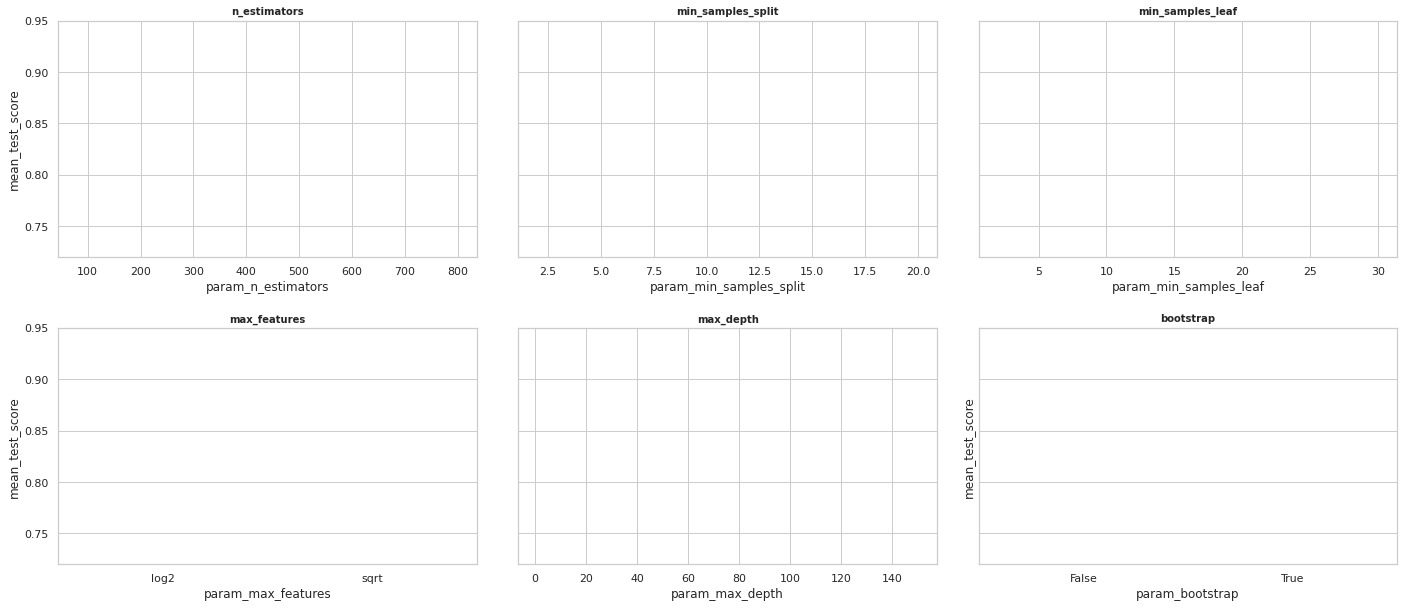

In [27]:
sns.set(style="whitegrid", color_codes=True, font_scale = 1)
fig, axs = plt.subplots(ncols=3, nrows=2  , sharey=True)
fig.set_size_inches(24,10)
colors = sns.diverging_palette(240, 0, n=6 , center='dark')
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0],color=colors[5]) 
axs[0,0].set_ylim([.72,.95])
axs[0,0].set_title(label = 'n_estimators', size=10, weight='bold')
sns.lineplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1],color=colors[4])
#axs[0,1].set_ylim([.85,.93])
axs[0,1].set_title(label = 'min_samples_split', size=10, weight='bold')
sns.lineplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2],color=colors[3])
#axs[0,2].set_ylim([.80,.93])
axs[0,2].set_title(label = 'min_samples_leaf', size=10, weight='bold')
sns.boxplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0],color=colors[0])
#axs[1,0].set_ylim([.88,.92])
axs[1,0].set_title(label = 'max_features', size=10, weight='bold')
sns.lineplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1],color=colors[1])
#axs[1,1].set_ylim([.80,.93])
axs[1,1].set_title(label = 'max_depth', size=10, weight='bold')
sns.boxplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2] , color=colors[2])
#axs[1,2].set_ylim([.88,.92])
axs[1,2].set_title(label = 'bootstrap', size=10, weight='bold')
fig.subplots_adjust(wspace=0.1 , hspace=0.3)

plt.show()


### Result
> Best Model Parameters
```

{'n_estimators': 288,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 150,
 'bootstrap': False}
```
> Best Parameter values

```
{'n_estimators': [136 , 309 , 347,385],
 'min_samples_split': [7,12,44],
 'min_samples_leaf': [2,7,12],
 'max_features': 'sqrt',
 'max_depth': [43 ,85, 100],
 'bootstrap': False}
```

## Grid Search

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
n_estimators = [140 , 170 , 230]
max_features = ['sqrt'] 
bootstrap = [False]
max_depth =  [56 ,85, 100]
min_samples_leaf = [2,12]
min_samples_split = [7,18,28]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [ ]:
gs = GridSearchCV(rfc_v2 , param_grid , cv=5 , verbose=5 , n_jobs=-1)
gs.fit(data_val , data_label)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [56, 85, 100],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2, 12],
                         'min_samples_split': [7, 18, 28],
                         'n_estimators': [140, 170, 230]},
             verbose=5)

In [ ]:
gs.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 18,
 'n_estimators': 140}

# Best Random Forest

So Now we have identified best random Forest , lets see how its various performance are.

## Load Data

In [81]:
np.random.seed(433)
data = data.sample(frac=1)


In [82]:
data_label = data['class']
x = data.copy()
y = data_label.copy()

In [83]:
x

,class,src_n,src_id,significance,photflux_aper_hilim_b,photflux_aper_lolim_h,photflux_aper_lolim_s,photflux_aper_lolim_m,photflux_aper_s,photflux_aper_lolim_u,...,kp_prob,hard_hs_lolim,hard_ms_lolim,hard_ms,hard_hs,hard_hs_hilim,hard_hm,hard_hm_hilim,hard_hm_lolim,hard_ms_hilim
obs_id,,,,,,,,,,,,,,,,,,,,,
PULSAR_OBS_212,OTHER,PSR J1741-205,PL0079,98.07,0.966735,0.409341,1.482394,1.160394,1.544292,2.342881,...,-0.057344,-1.178025,-0.615319,-0.858953,-1.319149,-1.530528,-1.046057,-1.360807,-0.866223,-1.341557
BH_OBS_124,OTHER,J1242+3232,BH0025,2.26,-0.942158,-1.186856,-0.105034,-1.951858,-0.324103,-0.355652,...,0.130903,-1.212145,-1.126677,-0.927542,-1.424593,-0.909533,0.334812,0.753663,-0.545633,-1.172063
PULSAR_OBS_42,OTHER,PSR J0359+5414,PL0010,9.65,-1.357406,-0.879152,-0.533065,-0.720770,-0.628481,0.218758,...,-0.118454,-0.154645,-0.248789,-0.137552,0.041724,0.268912,0.004279,0.112168,-0.106298,0.015672
PULSAR_OBS_129,OTHER,PSR J1023-574,PL0029,22.45,-0.101895,0.289672,-0.201854,0.107650,-0.306935,0.132609,...,-0.014518,0.837311,0.846198,0.666741,0.800997,0.812836,0.551905,0.516381,0.611030,0.705348
CV_OBS_390,CV,CXOGLB J002402.1-72054,CV0069,46.73,0.038804,0.491214,-0.328526,-0.168957,-0.362893,-1.128608,...,0.043627,1.528883,0.122650,0.442801,1.291226,1.353100,0.814189,1.020369,1.380084,0.615795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NS_OBS_407,OTHER,SAXWFC J1748.1-2446.,NS0072,19.47,-0.539649,0.303984,-1.547883,-0.953054,-1.457158,-1.339953,...,-2.329223,1.695056,1.246609,1.738739,1.215808,1.040005,0.852604,0.883392,1.394325,1.528297
PULSAR_OBS_263,OTHER,PSR J1745-2900,PL0081,107.91,-0.256660,0.263332,-1.422740,-0.633752,-1.224352,0.240849,...,1.897332,1.093191,-0.620114,0.195546,1.033782,0.972940,1.274707,1.237409,1.317624,1.160107
CV_OBS_753,CV,XMMSL2 J004231.9+41162,CV0110,174.76,1.499693,1.474021,1.362754,1.531979,1.379410,-0.466835,...,-0.928105,0.966281,1.104093,0.659891,0.564448,0.239524,-0.052509,-0.438313,0.593424,0.177691


## Train and save model

{'n_estimators': 402,
 'min_samples_split': 16,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 12,
 'bootstrap': False}

In [84]:
# Find and fit besst model
train_acc = []
test_acc = []
best_clf = ''
score = 0 
for i in tqdm(range(1)):
    rs = int(np.random.uniform(10 , 99999))
    '''
    27601 0.958974358974359
    79324
    '''
    np.random.seed(rs)
    rs = 31544 # all
    #rs = 31374 # CV-XRB 
    #rs = 65845 # xrb-pulsar
    #rs = 59360 #cv-pulsar
    rs = 31544 # NS-BH

    df =  x.sample(frac=1 , random_state=rs)
    y = df['class']
    x_train , x_test , _ , _ = train_test_split(df , y , test_size=0.1 , shuffle=True, random_state=10 , stratify=y)
    info_col = ['src_n' , 'src_id' , 'significance' , 'class']
    id_train = x_train[info_col]
    id_test = x_test[info_col]
    y_train = x_train['class']
    y_test = x_test['class']
    x_train = x_train.drop(info_col , axis=1)
    x_test = x_test.drop(info_col , axis = 1 )
    #np.random.seed(5926)
    clf = RandomForestClassifier(
        n_estimators= 400 , 
        criterion='entropy' ,
        random_state=12,
        max_depth=85 , 
        min_samples_leaf= 2 , 
        min_samples_split=2 , 
        bootstrap=False ,
        max_features='sqrt' ,
        class_weight='balanced'
        )
    clf.fit(x_train , y_train)
    tr = clf.score(x_train , y_train)
    next_score = clf.score(x_test , y_test)
    if(next_score > score):
        best_clf = clf
        score = next_score
        print('better found' , rs , next_score)
    #print(next_score , score)
    #print('\n -----------------')
    #print(rs , tst)
    ##train_acc.append(tr)
    #test_acc.append(tst)

100%|██████████| 1/1 [00:04<00:00,  4.28s/it]

better found 31544 0.9743589743589743


In [85]:
test_score =  best_clf.score(x_test , y_test)
print(test_score)

0.9743589743589743


### Test performance

In [86]:
info_col = ['src_n' , 'src_id' , 'significance' , 'class']
#x_val = test_data[test_data['class'].isin(class_to_select)]
x_val = test_data.copy()
y_val = x_val['class']
x_val = x_val.drop(columns=info_col)
x_val 

,photflux_aper_hilim_b,photflux_aper_lolim_h,photflux_aper_lolim_s,photflux_aper_lolim_m,photflux_aper_s,photflux_aper_lolim_u,photflux_aper_h,photflux_aper_hilim_u,photflux_aper_hilim_s,photflux_aper_m,...,kp_prob,hard_hs_lolim,hard_ms_lolim,hard_ms,hard_hs,hard_hs_hilim,hard_hm,hard_hm_hilim,hard_hm_lolim,hard_ms_hilim
obs_id,,,,,,,,,,,,,,,,,,,,,
BH_OBS_161,0.326536,0.745035,-1.529405,-1.322178,-1.288191,0.912173,0.708224,1.295156,-0.900863,-0.605364,...,-0.398802,1.386468,0.699171,1.209727,1.249875,1.194242,1.161950,1.156769,1.411816,1.759492
BH_OBS_153,0.307050,0.186235,0.038476,0.000052,-0.104177,0.540581,0.614199,0.308042,0.238856,-0.032690,...,-0.000241,0.820709,-1.291524,-1.382809,1.249875,1.194242,1.293398,1.192059,1.070804,0.061474
BH_OBS_113,-1.032851,-1.153975,-0.028222,-0.681739,-0.270783,0.750101,-1.316494,0.399894,-0.310238,-0.838196,...,1.031978,-1.125584,-0.819182,-0.672292,-1.066802,-1.072799,-0.761301,-0.362290,-1.107696,-0.854891
BH_OBS_59,-1.893722,-1.380435,-1.913040,-1.073507,-1.529290,0.454109,-1.340983,0.590652,-1.569245,-1.007069,...,0.110274,-1.212145,0.905121,1.883476,-1.424593,-0.073439,-1.990834,-1.248963,-1.665379,1.759492
BH_OBS_120,2.129977,1.788448,2.147187,2.130534,2.622295,2.668231,1.782387,1.880397,2.586196,2.380933,...,1.876196,0.208277,0.581141,0.052278,-0.017112,-0.236705,-0.065447,-0.422585,0.264607,-0.461525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PULSAR_OBS_429,-1.348518,-1.065655,-0.633633,-0.697528,-0.649896,-1.138006,-1.187549,-0.863954,-0.609361,-0.625138,...,0.613959,-0.270240,-0.047399,0.170066,0.063225,0.388566,-0.265043,0.027244,-0.570261,0.448506
PULSAR_OBS_126,-0.472215,-0.189560,-0.868705,-0.083840,-0.753567,0.173471,-0.257552,0.042454,-0.751879,-0.011558,...,-1.416079,0.872383,1.469165,1.568535,1.033782,0.972940,0.091777,0.228011,-0.046663,1.421843
PULSAR_OBS_274,-0.254881,0.369144,-1.501060,-1.428951,-1.446348,-1.093818,0.313739,-1.175774,-1.667846,-1.220205,...,1.330034,1.135277,1.124117,1.568535,1.033782,0.972940,1.222963,1.206490,1.307060,1.421843


In [87]:
test_score =  best_clf.score(x_val , y_val)
print(test_score)

1.0


### Save model


In [84]:
#import joblib 
#joblib.dump(best_clf , 'forest/v2/all-clf.joblib' , compress=3)

['forest/v2/all-clf.joblib']

### Entropy-Wise Feature Importance

In [88]:
feat_imp = clf.feature_importances_
feat_names = x_train.columns.to_list()
feat = pd.DataFrame()
feat.insert( 0 , 'feat_name' , feat_names)
feat.insert(1 , 'feat_imp' , feat_imp)
feat = feat.sort_values(by = 'feat_imp' , ascending=False).reset_index(drop=True)
feat_names_sorted = feat['feat_name']
display(feat)
feat.to_csv('feat_imp/CV_imp.csv')

,feat_name,feat_imp
0,var_max,0.238920
1,var_sigma,0.178943
2,var_mean,0.134290
3,var_index,0.060059
4,var_min,0.049548
5,hard_hm_hilim,0.029325
6,hard_hm,0.020839
7,hard_hs_hilim,0.018625
8,hard_hs,0.015849
9,photflux_aper_lolim_b,0.013156


## Bake Result

### Function

In [94]:
def create_res_data(x , y , id_data  , cl_type):
    pred = clf.predict(x)
    pred_prob = np.asarray(clf.predict_proba(x))
    pred_prob_xrb = pred_prob[:,0]
    pred_prob_cv = pred_prob[:,1]
    #pred_prob_pulsar = pred_prob[:,2]
    pred_prob = [np.amax(pi) for pi in pred_prob]
    res =  x.copy()
    res = res[feat_names_sorted]
    #id_data = id_data.reset_index(drop=True)
    res.insert(0 , 'clf_type' , [cl_type]*len(res))
    res.insert(1 , 'true_class' , y)
    res.insert(2 ,'pred_class' , pred)
    res.insert(3 , 'pred_prob' , pred_prob)
    res.insert(4 , 'CV_prob' , pred_prob_xrb)
    res.insert(5 , 'XRB_prob' , pred_prob_cv)
    #res.insert(5 , 'PULSAR_prob' , pred_prob_pulsar)
    res = pd.concat([id_data , res] , axis=1).drop('class' , axis=1)
    truth = []
    th_class = [] 
    is_ok = [] 
    for tc , pc , pp in zip(res['true_class'] , res['pred_class'] , res['pred_prob']):
        if(tc==pc): is_ok.append(1)
        else: is_ok.append(0)
        if(pp > 0.7):
            th_class.append(pc)
            if(tc==pc):
                truth.append(1)
            else: truth.append(0)
        else :
            truth.append(2)
            th_class.append('X')
    res.insert(5 , 'th_class' , th_class )
    res.insert(6 , 'truth' , truth)
    res.insert(6 , 'is_ok' , is_ok)
    return res


### Bake it

In [95]:

train_res = create_res_data(x_train , y_train ,id_train , cl_type='train')
test_res = create_res_data(x_test , y_test ,id_test , cl_type='test')
#train_res.to_csv('result/train_res_rf.csv')
#test_res.to_csv('result/test_res_rf.csv')
res_data = pd.concat([test_res])
#res_data =  res_data.set_index('obs_id')
#res_data.to_csv('../result/res_rf_tuned_rf_impute.csv')

# Result Analysis

In [96]:
cv_data = res_data[res_data['true_class']=='CV']
cv_sources = np.unique(cv_data['src_id'])
print('Num of CV sources :' , len(cv_sources))
print('Num of CV obs :' , len(cv_data))

cv_data = res_data[res_data['true_class']=='XRB']
cv_sources = np.unique(cv_data['src_id'])
print('Num of LMXRB sources :' , len(cv_sources))
print('Num of LMXRB obs :' , len(cv_data))

cv_data = res_data[res_data['true_class']=='PULSAR']
cv_sources = np.unique(cv_data['src_id'])
print('Num of PULSAR sources :' , len(cv_sources))
print('Num of PULSAR obs :' , len(cv_data))

Num of CV sources : 32
Num of CV obs : 47
Num of LMXRB sources : 23
Num of LMXRB obs : 41
Num of PULSAR sources : 16
Num of PULSAR obs : 29


In [97]:
data =  res_data.copy().query('clf_type=="test"')
#print(data)
total = len(data)
print('Total samples' , total)
am_clf = len(data[data['th_class']=='X'])
print('Ambiguous calssification : ' , am_clf)
wrong_clf = len(data[data['truth']==0])
print('Wrong calssification : ' , wrong_clf)

acc = (total-am_clf-wrong_clf)/total
print('Classification accuracy :{:.3f}'.format(acc))

Total samples 117
Ambiguous calssification :  3
Wrong calssification :  0
Classification accuracy :0.974


In [98]:
res_data_amb = res_data[res_data['th_class']=='X']
res_data_amb['true_class'].value_counts()

CV     2
XRB    1
Name: true_class, dtype: int64

## ROC Curve

In [91]:
from sklearn.metrics import roc_curve , det_curve , roc_auc_score

In [92]:
#fpr , fnr , threshold = det_curve(res_data['true_class'] , res_data['PULSAR_prob'] , pos_label='PULSAR')
#plt.plot(threshold , fpr)
fpr , fnr , threshold = det_curve(res_data['true_class'] , res_data['XRB_prob'] , pos_label='XRB')
plt.plot(threshold , fpr)
fpr , fnr , threshold = det_curve(res_data['true_class'] , res_data['CV_prob'] , pos_label='CV')
plt.plot(threshold , fpr)
plt.show()

ValueError: Only one class present in y_true. Detection error tradeoff curve is not defined in that case.

In [164]:
roc_auc = roc_auc_score(res_data['true_class'] , res_data['XRB_prob'])
roc_auc

0.988793671720501

## Feature Importance

multiplying the average standardised mean value of each feature split on each class, with the corresponding model._feature_importances array element. You can write a simple function that standardises your dataset, computes the mean of each feature split across class predictions, and does element-wise multiplication with the model._feature_importances array. The greater the absolute resulting values are, the more important the features will be to their predicted class, and better yet, the sign will tell you if it is small or large values that are important.

https://stackoverflow.com/questions/35249760/using-scikit-to-determine-contributions-of-each-feature-to-a-specific-class-pred/35255612

In [88]:
from sklearn.preprocessing import scale
import json
def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    for c in set(Y):
        print(c)
        out[c] = dict(
            zip(range(M), np.mean(X[Y==c, :], axis=0)*feature_importances)
        )
    return out


In [89]:
feat_imp = best_clf.feature_importances_ 
result = class_feature_importance(x_train , y_train , feat_imp)
#print(json.dumps(result,indent=4))

CV
XRB


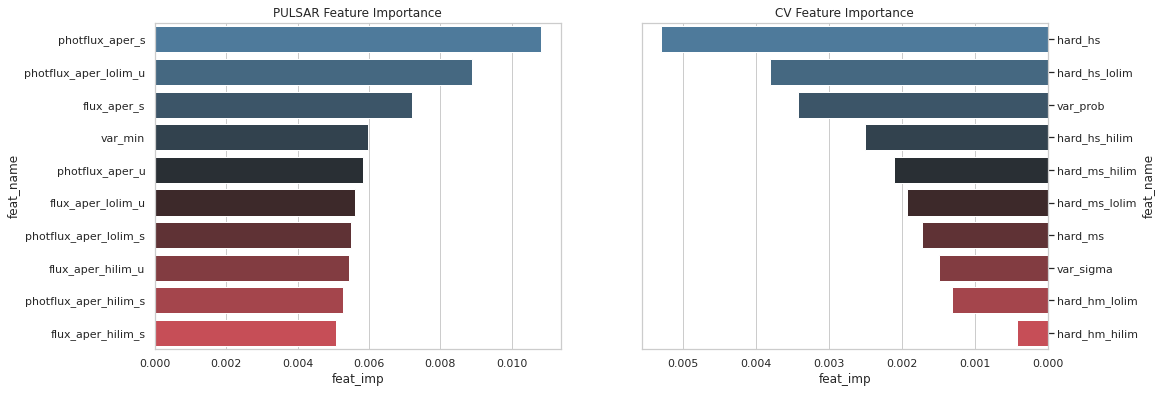

In [91]:
sns.set_style('whitegrid')
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(16,6))
feat_names = x_train.columns.to_list()
top_feat = 10
#result['BH'].keys() = feat_names
values = list(result['CV'].values())
df=  pd.DataFrame()
df.insert(0 , 'feat_name' , feat_names)
df.insert(1 , 'feat_imp' , values)
df = df.sort_values(by='feat_imp' , ascending=False)
df_feat_cla = df.copy() # cla - class A
palette = sns.diverging_palette(240, 10, n=top_feat , center='dark')
ax1 = sns.barplot(data = df.iloc[:top_feat,:] ,y = 'feat_name' , x = 'feat_imp'  ,palette = palette, ax=ax[0] )

values = list(result['XRB'].values())
df=  pd.DataFrame()
df.insert(0 , 'feat_name' , feat_names)
df.insert(1 , 'feat_imp' , values)
df = df.sort_values(by='feat_imp' , ascending=False)
df_feat_clb = df.copy() # clb - class B
palette = sns.diverging_palette(240, 10, n=top_feat , center='dark')
ax2 = sns.barplot(data = df.iloc[:top_feat,:] ,y = 'feat_name' , x = 'feat_imp'  ,palette = palette, ax=ax[1] )
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.invert_xaxis()
ax1.set_title('PULSAR Feature Importance')
ax2.set_title('CV Feature Importance')
plt.show()

In [92]:
def is_outlier(points, thresh):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = np.asarray(points)
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)
    modified_z_score = 0.6745 * diff / med_abs_deviation    
    return modified_z_score > thresh

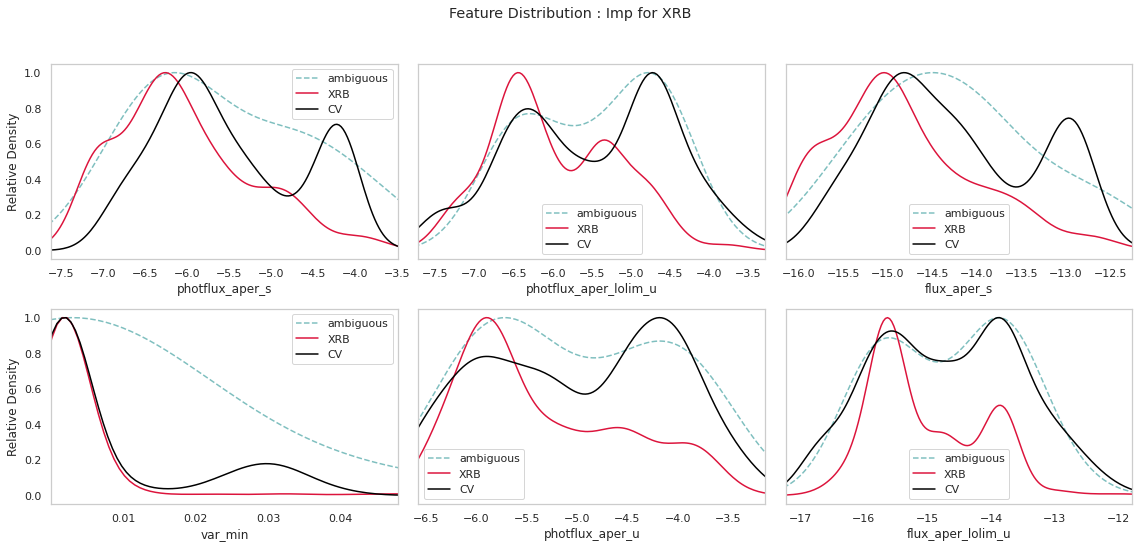

In [93]:
fig, axs = plt.subplots(2,3, sharey=True, sharex=False , figsize=(16 , 8))
col = sns.diverging_palette(240, 10, n=6 , center='dark')
f_name  =  df_feat_cla['feat_name'][:6]
axs = np.ndarray.flatten(axs)
sns.set_style('white')
i = 0 
for f , axi in zip(f_name , axs):
    if(f=='bb_nh_lolim'):
        filtered_res = res_data[~is_outlier(res_data[f] , thresh=150)]
    elif(f=='bb_nh'):
        filtered_res = res_data[~is_outlier(res_data[f] , thresh=100)]
    else:
        filtered_res = res_data[~is_outlier(res_data[f] , thresh=20)]
    #filtered_res = res_data.copy()
    #print(f)
    ax = sns.displot(data = res_data , x = f ,hue = 'true_class' , kind='kde' ,)
    plt.close()
    ax2 = sns.displot(data = res_data[res_data['th_class']=='X'] , x = f ,hue = 'th_class' , kind='kde' ,)
    plt.close()
    amb  , amb_x= ax2.ax.lines[0].get_ydata() , ax2.ax.lines[0].get_xdata()
    amb =  amb / np.amax(amb)
    bh  ,  bh_x = ax.ax.lines[0].get_ydata() , ax.ax.lines[0].get_xdata() 
    bh = bh /np.amax(bh) 
    ns , ns_x = ax.ax.lines[1].get_ydata() , ax.ax.lines[1].get_xdata()
    ns = ns/np.amax(ns)
    #x_val = ax.ax.lines[0].get_xdata() , ax.ax.lines[1].get_xdata()
    #plt.close()
    axi.plot(amb_x , amb , label = 'ambiguous' , color='teal' , alpha=0.5 , linestyle='--')
    axi.plot(ns_x , ns , label = 'XRB' , color='crimson')
    axi.plot(bh_x , bh , label = 'CV' , color = 'black')
    axi.legend()
    axi.set_xlim(np.amin(filtered_res[f]) , np.amax(filtered_res[f]))
    axi.grid(True , color='k' , linestyle=':' , alpha=0.4)
    axi.grid(False)
    axi.set_xlabel(f)
    #axi.set_xscale('log')
    if(not(i%3)):
        axi.set_ylabel('Relative Density')
    i+=1    
    #axi.text(0.1 , 0.1 ,  'Feature : '+f)
fig.suptitle('Feature Distribution : Imp for XRB')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
plt.close()


/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Attempting to set identical left == right == 0.6392323144850272 results in singular transformations; automatically expanding.


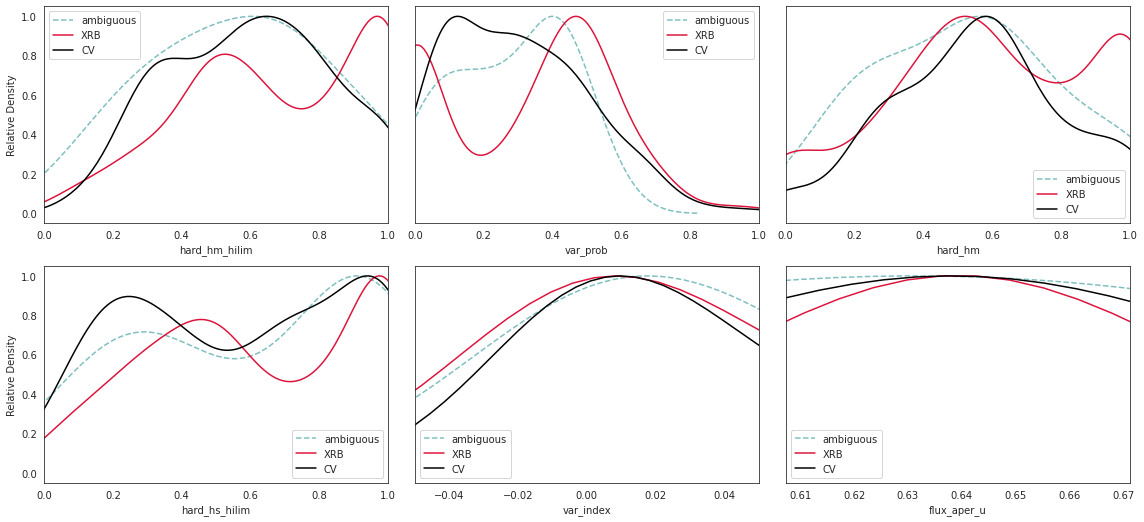

In [56]:
fig, axs = plt.subplots(2,3, sharey=True, sharex=False , figsize=(16 , 8))
col = sns.diverging_palette(240, 10, n=6 , center='dark')
f_name  =  df_feat_clb['feat_name'][:6]
axs = np.ndarray.flatten(axs)
sns.set_style('white')
i = 0 
for f , axi in zip(f_name , axs):
    if(f=='bb_stat'):
        filtered_res = res_data[~is_outlier(res_data[f] , thresh=650)]
    else:
        filtered_res = res_data[~is_outlier(res_data[f] , thresh=350)]
    #filtered_res = res_data.copy()
    #print(f)
    ax = sns.displot(data = res_data , x = f ,hue = 'true_class' , kind='kde' ,)
    plt.close()
    ax2 = sns.displot(data = res_data[res_data['th_class']=='X'] , x = f ,hue = 'th_class' , kind='kde' ,)
    plt.close()
    amb  , amb_x= ax2.ax.lines[0].get_ydata() , ax2.ax.lines[0].get_xdata()
    amb =  amb / np.amax(amb)
    bh  ,  bh_x = ax.ax.lines[0].get_ydata() , ax.ax.lines[0].get_xdata() 
    bh = bh /np.amax(bh) 
    ns , ns_x = ax.ax.lines[1].get_ydata() , ax.ax.lines[1].get_xdata()
    ns = ns/np.amax(ns)
    #x_val = ax.ax.lines[0].get_xdata() , ax.ax.lines[1].get_xdata()
    #plt.close()
    axi.plot(amb_x , amb , label = 'ambiguous' , color='teal' , alpha=0.5 , linestyle='--')
    axi.plot(ns_x , ns , label = 'XRB' , color='crimson')
    axi.plot(bh_x , bh , label = 'CV' , color = 'black')
    axi.legend()
    axi.set_xlim(np.amin(filtered_res[f]) , np.amax(filtered_res[f]))
    axi.grid(True , color='k' , linestyle=':' , alpha=0.4)
    axi.grid(False)
    axi.set_xlabel(f)
    #axi.set_xscale('log')
    if(not(i%3)):
        axi.set_ylabel('Relative Density')
    i+=1    
    #axi.text(0.1 , 0.1 ,  'Feature : '+f)
#fig.suptitle('Feature Distribution')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
plt.close()
